<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [10]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [31]:
## TASK 4

<AxesSubplot:ylabel='MEDV'>

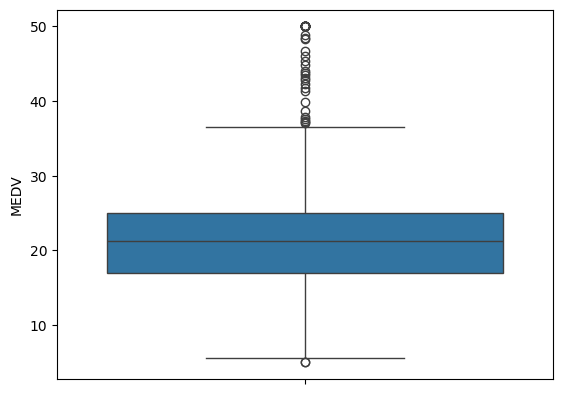

In [22]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
sns.boxplot(y="MEDV", data=boston_df)

<AxesSubplot:>

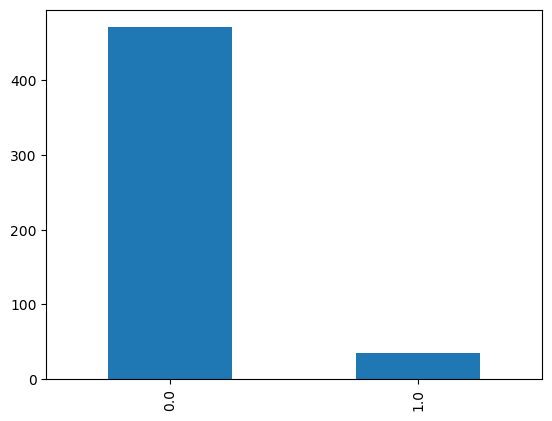

In [28]:
# Provide a  bar plot for the Charles river variable
boston_df['CHAS'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='AGE GROUP', ylabel='MEDV'>

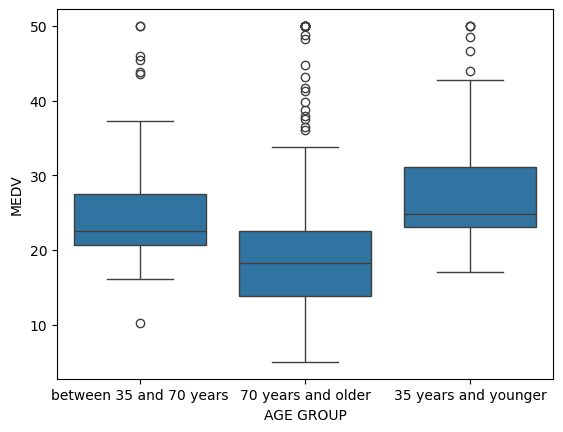

In [21]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[boston_df['AGE']<=35, 'AGE GROUP'] = "35 years and younger"
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']< 70), 'AGE GROUP'] = "between 35 and 70 years"
boston_df.loc[boston_df['AGE']>= 70, 'AGE GROUP'] = "70 years and older"
sns.boxplot(x = 'AGE GROUP', y="MEDV", data=boston_df)

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

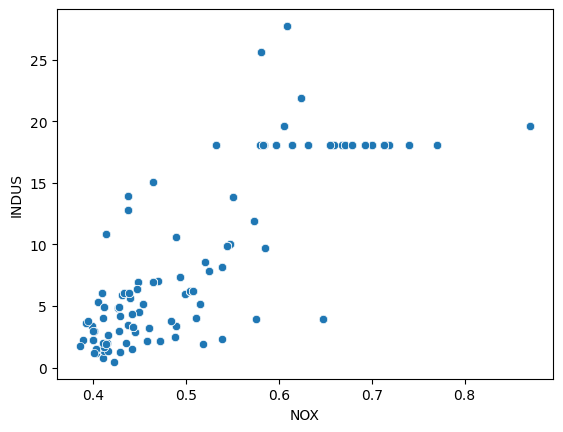

In [29]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df)

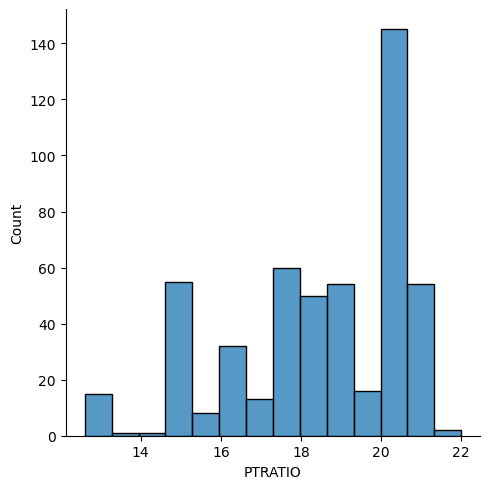

In [30]:
# Create a histogram for the pupil to teacher ratio variable
sns.displot(x = "PTRATIO", data = boston_df)

In [32]:
## TASK 5

In [34]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE GROUP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


In [38]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? 
# (T-test for independent samples)
t_stats, p_val = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'])
alpha = 0.05
if p_val < alpha:
  print("P Value: ", p_val)
  print("Reject null hypothesis, there a significant difference in median value of houses bounded by the Charles river ")
else:
  print("P Value: ", p_val)
  print("Accept null hypothesis")

P Value:  7.390623170519905e-05
Reject null hypothesis, there a significant difference in median value of houses bounded by the Charles river 


<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

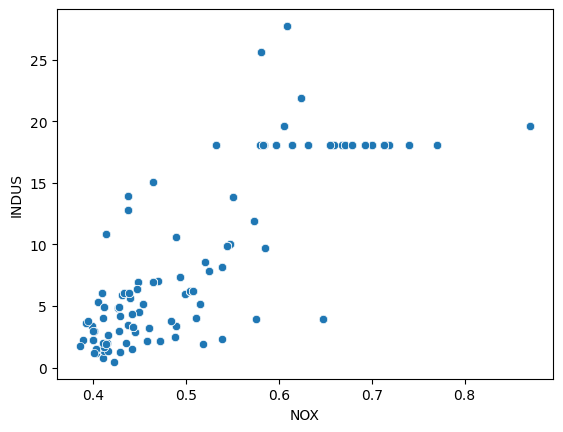

In [39]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of 
# non-retail business acres per town? (Pearson Correlation)
sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df)

In [40]:
#  there is a positive correlation between INDUS and NOX